In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy import signal

### Funciones generales:

In [177]:
def cargar(nombre):
    img = Image.open(nombre).convert(mode='L')
    return np.array(img)


def mostrar(imagen, titulo = ""):
    plt.figure(figsize=(9, 9))
    if (titulo): plt.title(titulo)
    plt.imshow(imagen, cmap='gray', vmin=0, vmax=255)

def pasarALog(imagen):
    c = 255 / np.log(1 + np.max(imagen))
    resultado = np.uint8(c * np.log(1 + imagen))
    return resultado

### Ejercicio 1 (verificación)

In [4]:
# verificación 2.c
x = np.array([0, 2, -1, 0, 0, 0])
h = np.array([0, -1, 2, 1, 0])

signal.convolve(h, x)

array([ 0,  0, -2,  5,  0, -1,  0,  0,  0,  0])

### Ejercicio 2 (verificación)

In [25]:
# 2 i
x = np.array([[0, -1, 1], [-1, 4, -1], [0, -1, 0]])
h = np.array([[1, 4, 1], [2, 5, 3]])
signal.convolve2d(x, h, boundary="fill", fillvalue= 0)

array([[ 0, -1, -3,  3,  1],
       [-1, -2, 11,  2,  2],
       [-2,  2, 11,  6, -3],
       [ 0, -2, -5, -3,  0]])

### Ejercicio 3

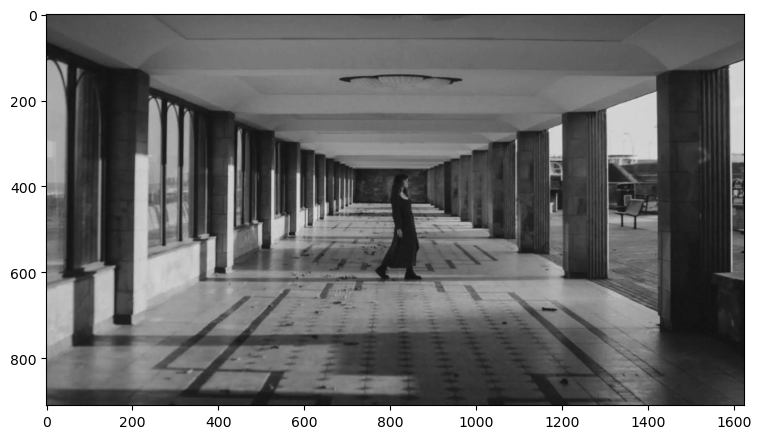

In [178]:
imagenA = cargar("imagen.png")
mostrar(imagenA)

In [148]:
def ventana_gauss(dimension, desviacion):
    gauss1d = signal.windows.gaussian(dimension, desviacion)
    gauss2d = np.outer(gauss1d, gauss1d)
    return gauss2d / sum(sum(gauss2d))

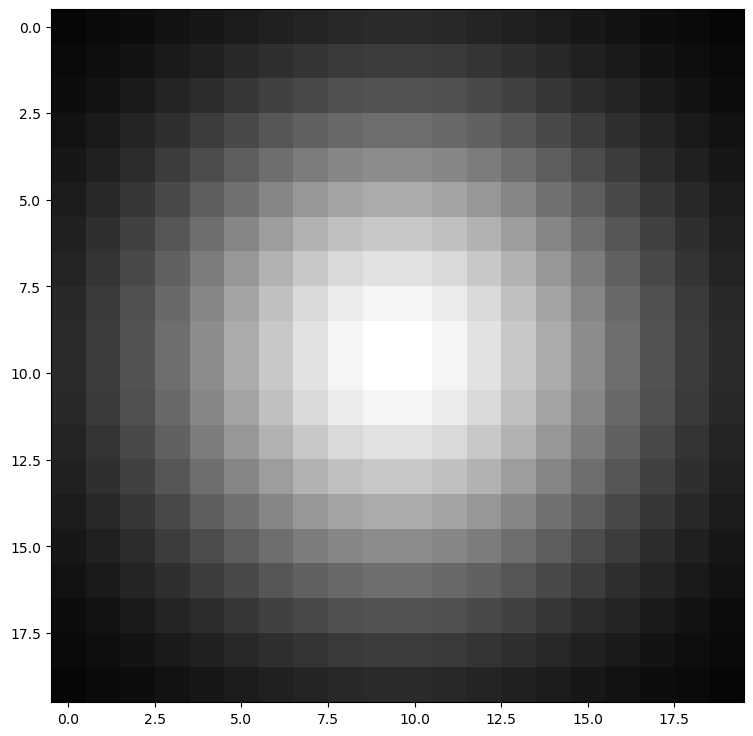

In [174]:
gauss = ventana_gauss(20, 5)
mostrar(pasarALog(gauss))

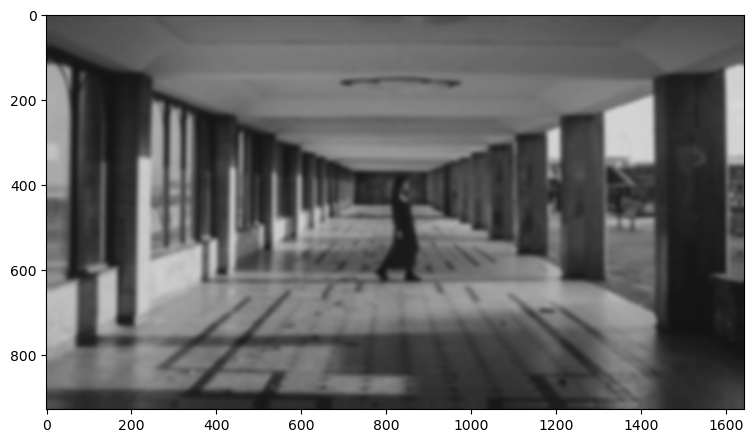

In [150]:
#ventana suavizado:
H = np.ones((10, 10)) / 100

suave = signal.convolve2d(imagenA, gauss, boundary="symm")
mostrar(suave)

In [153]:
def sharpen(imagen, std, cantidad):
    gauss = ventana_gauss(int(4 * std), std)
    suave = signal.convolve2d(imagen, gauss, boundary="symm", mode="same")
    diferencia = imagen - suave
    return imagen + cantidad * diferencia

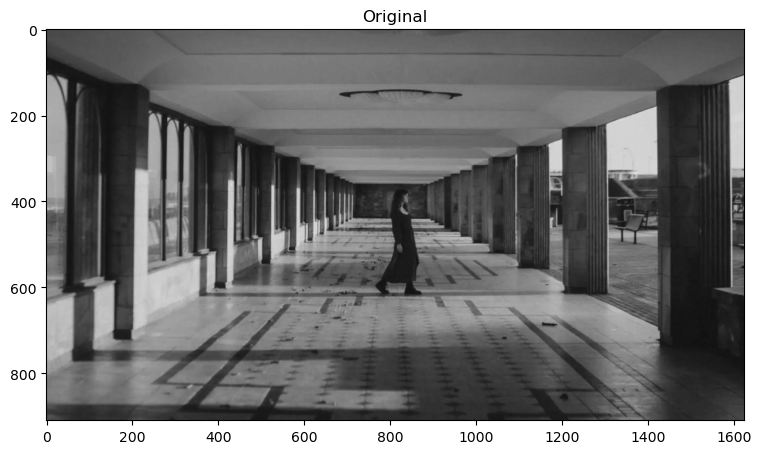

In [179]:
mostrar(imagenA, "Original")

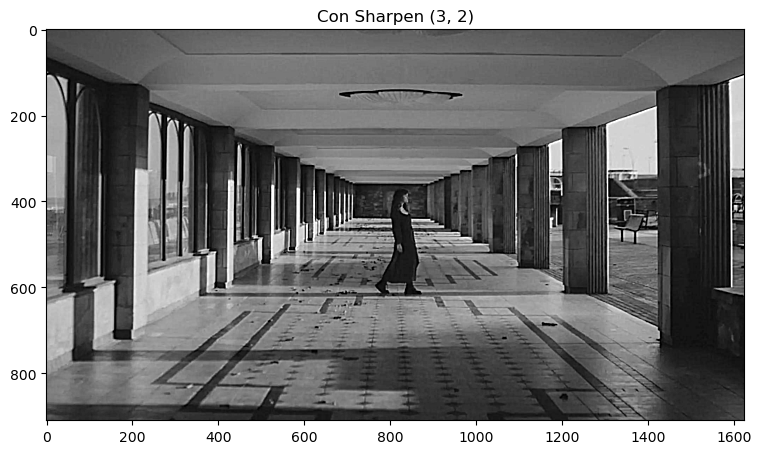

In [180]:
mostrar(sharpen(imagenA, 3, 2), "Con Sharpen (3, 2)")

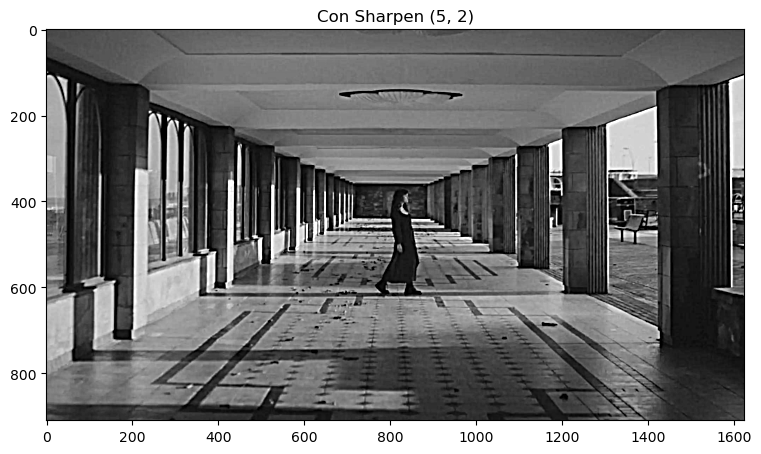

In [181]:
mostrar(sharpen(imagenA, 5, 2), "Con Sharpen (5, 2)")

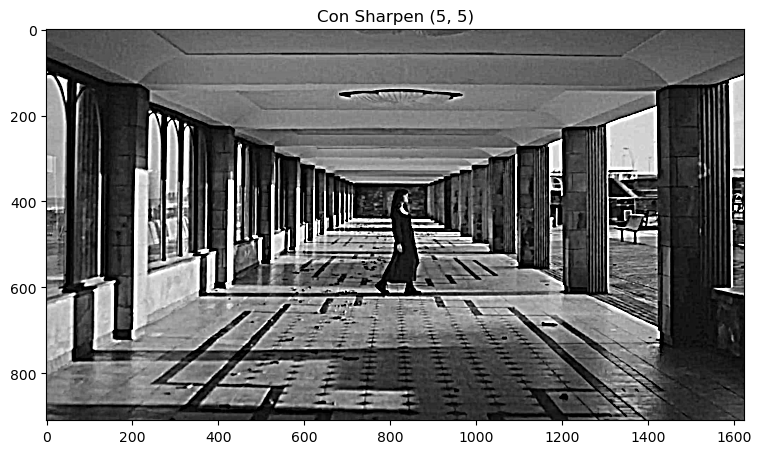

In [183]:
mostrar(sharpen(imagenA, 5, 5), "Con Sharpen (5, 5)")

### Ejercicio 4